In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sb 
from sklearn.neighbors import KNeighborsRegressor
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import metrics

In [78]:
df=pd.read_csv("D:/Ml projects/Basic ML projects/Datasets/data.csv",delimiter=",")
df.head()

,Unnamed: 0.1,Unnamed: 0,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,0,0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,1,1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
2,2,2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1
3,3,3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1
4,4,4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69.323529,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       893 non-null    int64  
 1   Unnamed: 0         893 non-null    int64  
 2   brand              893 non-null    object 
 3   name               893 non-null    object 
 4   price              893 non-null    int64  
 5   spec_rating        893 non-null    float64
 6   processor          893 non-null    object 
 7   CPU                893 non-null    object 
 8   Ram                893 non-null    object 
 9   Ram_type           893 non-null    object 
 10  ROM                893 non-null    object 
 11  ROM_type           893 non-null    object 
 12  GPU                893 non-null    object 
 13  display_size       893 non-null    float64
 14  resolution_width   893 non-null    float64
 15  resolution_height  893 non-null    float64
 16  OS                 893 non

In [80]:
df['brand'].unique()

array(['HP', 'Acer', 'Lenovo', 'Apple', 'Dell', 'Asus', 'Samsung',
       'Ultimus', 'Primebook', 'MSI', 'Infinix', 'Wings', 'Honor',
       'Zebronics', 'Xiaomi', 'iBall', 'Chuwi', 'Realme', 'Avita',
       'Walker', 'Huawei', 'Tecno', 'Gigabyte', 'Vaio', 'Microsoft',
       'Fujitsu', 'LG', 'Ninkear', 'Razer', 'AXL'], dtype=object)

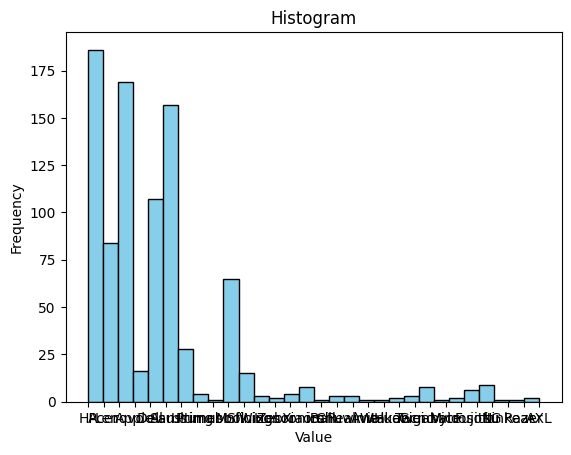

In [81]:
# Plot histogram
plt.hist(df['brand'], bins=len(df['brand'].unique()), color='skyblue', edgecolor='black')
# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
# Show plot
plt.show()

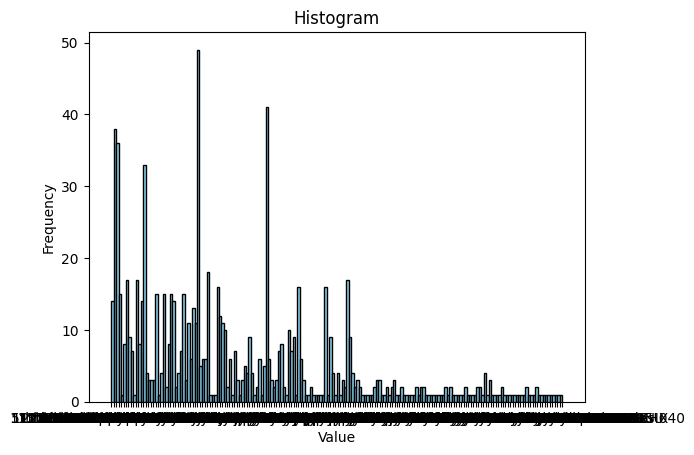

In [82]:
# Plot histogram
plt.hist(df['processor'], bins=len(df['processor'].unique()), color='skyblue', edgecolor='black')
# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
# Show plot
plt.show()

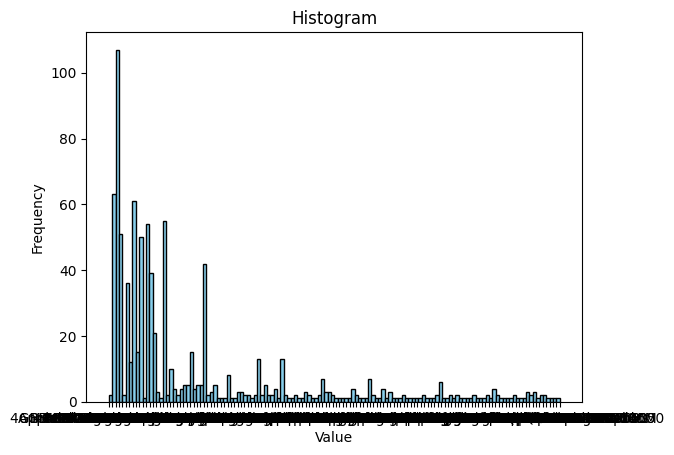

In [83]:
# Plot histogram
plt.hist(df['GPU'], bins=len(df['GPU'].unique()), color='skyblue', edgecolor='black')
# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
# Show plot
plt.show()

In [84]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,price,spec_rating,display_size,resolution_width,resolution_height,warranty
count,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000
mean,467.135498,521.382979,79907.409854,69.379026,15.173751,2035.393057,1218.324748,1.079507
std,270.209769,299.916605,60880.043823,5.541555,0.939095,426.076009,326.756883,0.326956
min,0.000000,0.000000,9999.000000,60.000000,11.600000,1080.000000,768.000000,0.000000
25%,235.000000,265.000000,44500.000000,66.000000,14.000000,1920.000000,1080.000000,1.000000
50%,467.000000,531.000000,61990.000000,69.323529,15.600000,1920.000000,1080.000000,1.000000
75%,702.000000,784.000000,90990.000000,71.000000,15.600000,1920.000000,1200.000000,1.000000
max,930.000000,1019.000000,450039.000000,89.000000,18.000000,3840.000000,3456.000000,3.000000


In [85]:
print(df[df['Ram_type']=='Unified'])

     Unnamed: 0.1  Unnamed: 0  brand  ... resolution_height      OS  warranty
206           213         241  Apple  ...            1664.0  Mac OS         1
375           395         436  Apple  ...            1964.0  Mac OS         1
376           396         437  Apple  ...            1964.0  Mac OS         1
468           489         555  Apple  ...            1964.0  Mac OS         1
469           490         556  Apple  ...            2234.0  Mac OS         1
504           528         599  Apple  ...            2234.0  Mac OS         1
505           529         600  Apple  ...            1964.0  Mac OS         1

[7 rows x 18 columns]


In [86]:
df.drop(columns=['Unnamed: 0.1','Unnamed: 0','name'],inplace=True)

Need to write functions for doing cleaning strings and values for better one shot encoding

In [87]:
def getThreadsFromCPU(cpu):
        l=0
        if len(cpu.split(","))>1:
            l=cpu.split(",")[1].replace("Threads","")
        return int(l)
def getCoresFromCPU(cpu):
    cpu=cpu.strip()
    l=cpu.split(",")[0].split(" ")[0]
    try:
        l=l.strip()
        return int(l)
    except:
        if "hexa" in l.lower():
            return 6
        elif "octa" in l.lower():
            return 8
        elif "dual" in l.lower():
            return 2
        elif "quad" in l.lower():
            return 4
        return 0
def getRAMTypeCorrect(ram):
    ram=ram.upper()
    if "DDR4" in ram:
        return "DDR4"
    return ram
def getOSCategory(os):
    if "windows" in os.lower():
        return "Windows"
    elif "mac" in os.lower():
        return "Mac"
    else:
        return "other"


In [88]:
#does have room for reducing for case sensitivity
def reductionOfDimensionAndOptimizingDataTypes(df):
    freqBrandList=['HP', 'Acer', 'Lenovo', 'Apple', 'Dell', 'Asus', 'Samsung',
     'MSI']
    df['Thread']=df['CPU'].apply(getThreadsFromCPU)
    df['Cores']=df['CPU'].apply(getCoresFromCPU)
    df['Ram']=df['Ram'].astype(str).apply(lambda r:int( r.replace("GB","").replace("TB","") ))
    df['Ram_type']=df['Ram_type'].apply(getRAMTypeCorrect)
    df['ROM']=df['ROM'].astype(str).apply(lambda r:int( r.replace("GB","").replace("TB","") ))
    df['GPU']=df['GPU'].apply(lambda r: r.strip().upper() )
    df['processor']=df['processor'].apply(lambda r: r.strip().upper() )
    df['brand']=df['brand'].apply(lambda r: "Other" if r not in freqBrandList else r)
    df['OS']=df['OS'].apply(getOSCategory)
    df.drop(columns=['CPU'],inplace=True)
    
    return df
    
df=reductionOfDimensionAndOptimizingDataTypes(df)
df.head()

    
    
    

,brand,price,spec_rating,processor,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty,Thread,Cores
0,HP,49900,73.000000,5TH GEN AMD RYZEN 5 5600H,8,DDR4,512,SSD,4GB AMD RADEON RX 6500M,15.6,1920.0,1080.0,Windows,1,12,6
1,HP,39900,60.000000,12TH GEN INTEL CORE I3 1215U,8,DDR4,512,SSD,INTEL UHD GRAPHICS,15.6,1920.0,1080.0,Windows,1,8,6
2,Acer,26990,69.323529,11TH GEN INTEL CORE I3 1115G4,8,DDR4,512,SSD,INTEL IRIS XE GRAPHICS,14.0,1920.0,1080.0,Windows,1,4,2
3,Lenovo,59729,66.000000,12TH GEN INTEL CORE I5 1240P,16,LPDDR5,512,SSD,INTEL INTEGRATED IRIS XE,14.0,2240.0,1400.0,Windows,1,16,12
4,Apple,69990,69.323529,APPLE M1,8,DDR4,256,SSD,APPLE M1 INTEGRATED GRAPHICS,13.3,2560.0,1600.0,Mac,1,0,8


In [89]:
df.describe()

,price,spec_rating,Ram,ROM,display_size,resolution_width,resolution_height,warranty,Thread,Cores
count,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000
mean,79907.409854,69.379026,13.251960,377.926092,15.173751,2035.393057,1218.324748,1.079507,11.778275,7.927212
std,60880.043823,5.541555,6.476961,216.022055,0.939095,426.076009,326.756883,0.326956,5.721498,4.173677
min,9999.000000,60.000000,2.000000,1.000000,11.600000,1080.000000,768.000000,0.000000,0.000000,2.000000
25%,44500.000000,66.000000,8.000000,256.000000,14.000000,1920.000000,1080.000000,1.000000,8.000000,4.000000
50%,61990.000000,69.323529,16.000000,512.000000,15.600000,1920.000000,1080.000000,1.000000,12.000000,8.000000
75%,90990.000000,71.000000,16.000000,512.000000,15.600000,1920.000000,1200.000000,1.000000,16.000000,10.000000
max,450039.000000,89.000000,64.000000,512.000000,18.000000,3840.000000,3456.000000,3.000000,32.000000,24.000000


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              893 non-null    object 
 1   price              893 non-null    int64  
 2   spec_rating        893 non-null    float64
 3   processor          893 non-null    object 
 4   Ram                893 non-null    int64  
 5   Ram_type           893 non-null    object 
 6   ROM                893 non-null    int64  
 7   ROM_type           893 non-null    object 
 8   GPU                893 non-null    object 
 9   display_size       893 non-null    float64
 10  resolution_width   893 non-null    float64
 11  resolution_height  893 non-null    float64
 12  OS                 893 non-null    object 
 13  warranty           893 non-null    int64  
 14  Thread             893 non-null    int64  
 15  Cores              893 non-null    int64  
dtypes: float64(4), int64(6), o

In [91]:
numColForCoef=df.select_dtypes(exclude=["object"])
print(numColForCoef.corr())


                      price  spec_rating  ...    Thread     Cores
price              1.000000     0.546391  ...  0.558470  0.709253
spec_rating        0.546391     1.000000  ...  0.407831  0.437323
Ram                0.736924     0.402910  ...  0.543323  0.612999
ROM               -0.481178    -0.395981  ... -0.210237 -0.317494
display_size       0.233815     0.274206  ...  0.279073  0.218677
resolution_width   0.586042     0.337649  ...  0.377230  0.452205
resolution_height  0.604748     0.328525  ...  0.338490  0.425762
warranty           0.117101     0.109501  ...  0.131689  0.129119
Thread             0.558470     0.407831  ...  1.000000  0.780050
Cores              0.709253     0.437323  ...  0.780050  1.000000

[10 rows x 10 columns]


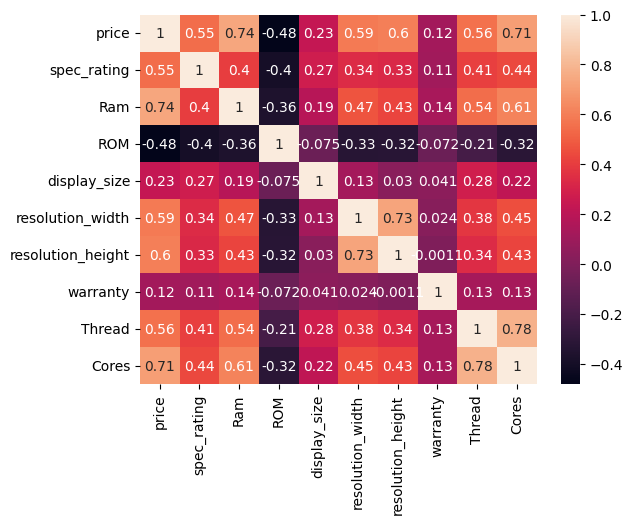

In [92]:
plot=sb.heatmap(numColForCoef.corr(),annot=True)
plt.show()

In [93]:
X=df.drop(columns=['price','display_size','warranty','ROM','ROM_type'])
y=df['price']

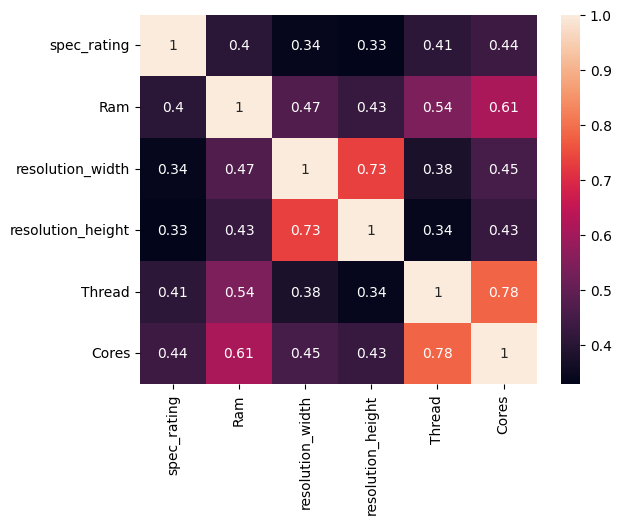

In [94]:
tempHeatMapDf=df.drop(columns=['price','display_size','warranty','ROM','ROM_type'])
plot=sb.heatmap(tempHeatMapDf.select_dtypes(exclude=['object']).corr(),annot=True)
plt.show()

In [95]:
sc=StandardScaler()
numCols=X.select_dtypes(exclude=["object"]).columns
catCols=X.select_dtypes(include=["object"]).columns
print(numCols.dtype,catCols)

object Index(['brand', 'processor', 'Ram_type', 'GPU', 'OS'], dtype='object')


In [96]:
def getDummiesTransformer(datas):
    return pd.get_dummies(datas)
customTransformerForDummies=Pipeline([
    ('dummies',FunctionTransformer(getDummiesTransformer))
])
standardizingColumns=ColumnTransformer(
    transformers=[("num",sc,numCols),
                  ("cat",customTransformerForDummies,catCols)
                  ],
    remainder="drop"
)
X=standardizingColumns.fit_transform(X)
y=sc.fit_transform(y.values.reshape(-1,1)).flatten()

In [97]:
X_train,X_test,y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=10)

Linear Regression didn't work well

In [98]:
reg=LinearRegression()
reg.fit(X_train,y_train)
reg.score(X_test,Y_test)

-1.1902172600414441e+19

KNN Has 76% accuracy

In [99]:
reg=KNeighborsRegressor()
reg.fit(X_train,y_train)
reg.score(X_test,Y_test)

0.7663706127431656

In [100]:
ann=Sequential()
ann.add(Dense(units=6,activation="relu"))
ann.add(Dense(units=6,activation="relu"))
ann.add(Dense(units=1))


In [101]:
ann.compile(optimizer="adam",loss="mean_squared_error",metrics=['accuracy'])
ann.fit(x=X_train,y=y_train,epochs=100,batch_size=32,validation_data=(X_test,Y_test),callbacks=EarlyStopping(monitor='val_loss',patience=4))

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.0000e+00 - loss: 1.2462 - val_accuracy: 0.0000e+00 - val_loss: 1.2161
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.8717 - val_accuracy: 0.0000e+00 - val_loss: 1.1048
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.6825 - val_accuracy: 0.0000e+00 - val_loss: 0.9415
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.6410 - val_accuracy: 0.0000e+00 - val_loss: 0.7575
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.3556 - val_accuracy: 0.0000e+00 - val_loss: 0.5960
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.3494 - val_accuracy: 0.0000e+00 - val_loss: 0.4686
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.2131 - val_accuracy: 0.0000e+00 - val_loss: 0.3867
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - ac

In [102]:
ann.evaluate(X_train,y_train)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - accuracy: 0.0000e+00 - loss: 0.0456


[0.058770373463630676, 0.0]

In [103]:
predictions = ann.predict(X_test)
predictions_df = pd.DataFrame(np.ravel(predictions),columns=["Predictions"])
comparison_df = pd.concat([pd.DataFrame(Y_test,columns=["Real Values"]), predictions_df],axis=1)
comparison_df 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


,Real Values,Predictions
0,-0.984740,-0.959792
1,-0.409516,-0.352084
2,0.773964,0.299106
3,-0.475256,-0.439623
4,-0.713563,-0.632832
...,...,...
174,1.048428,-0.132291
175,-0.162992,0.055721
176,-0.409516,-0.606370
177,0.769724,1.017837


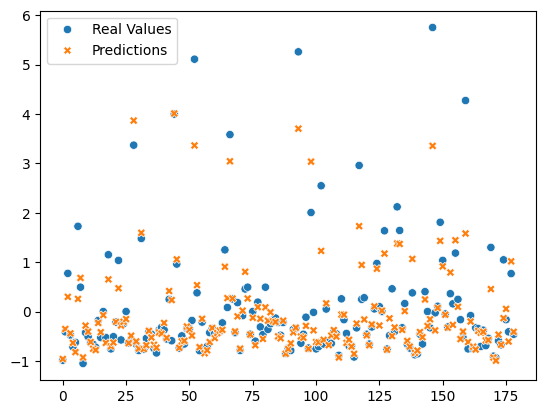

In [114]:
sb.scatterplot(comparison_df )
plt.show()

ANN Regression got 85% accuracy

In [116]:
metrics.explained_variance_score(Y_test,predictions)

0.8552075886620893